In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import numpy as np

In [2]:
data1 = pd.read_csv('data/ReverseChanel1_800nm_0_03.csv', sep=';')
data2 = pd.read_csv('data/ReverseChanel2_800nm_0_03.csv', sep=';')

In [3]:
data1.head(5)

,mV,mA
0,0.038872,7.774400e-07
1,0.038719,7.743800e-07
2,0.038475,7.695000e-07
3,0.038427,7.685300e-07
4,0.038401,7.680100e-07


In [4]:
data2.head(5)

,mV,mA
0,0.043223,8.644600e-07
1,0.043189,8.637900e-07
2,0.042808,8.561500e-07
3,0.042789,8.557800e-07
4,0.042232,8.446400e-07


In [5]:
data1 = data1['mV']
data2 = data2['mV']

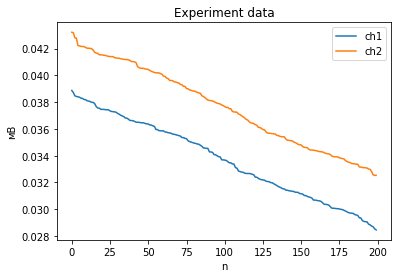

In [6]:
data1.plot(label='ch1')
data2.plot(label='ch2')
plt.title('Experiment data')
plt.xlabel('n')
plt.ylabel('мВ')
plt.legend()

In [7]:
ksi = 1e-4

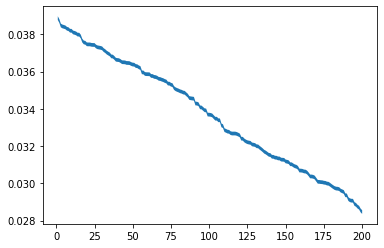

In [8]:
plt.fill_between(data1.index + 1, data1 - ksi, data1 + ksi)

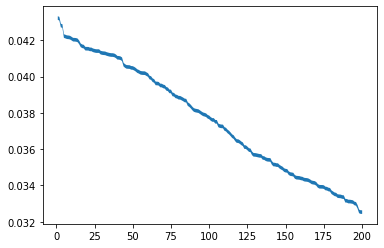

In [9]:
plt.fill_between(data2.index + 1, data2 - ksi, data2 + ksi)

In [10]:
def load_processed(filename):
    A = 0
    B = 0
    w = []
    with open(filename) as f:
        A, B = [float(t) for t in f.readline().split()]
        for line in f.readlines():
            w.append(float(line))
    return A, B, w

In [11]:
A1, B1, w1 = load_processed('data/Ch1.txt')
A2, B2, w2 = load_processed('data/Ch2.txt')

Text(0, 0.5, 'мВ')

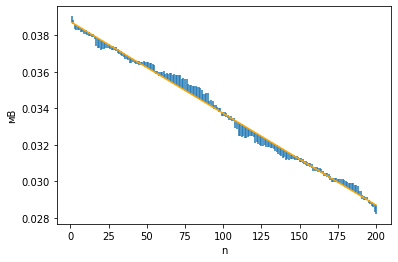

In [12]:
for i in data1.index:
    plt.vlines(i + 1, data1[i] + w1[i] * ksi, data1[i] - w1[i] * ksi)
plt.plot(np.arange(1, 201), A1 + B1 * (np.arange(1, 201)), label='lsm', color='orange')
plt.xlabel('n')
plt.ylabel('мВ')

Text(0, 0.5, 'мВ')

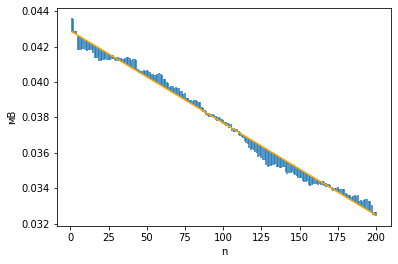

In [13]:
for i in data2.index:
    plt.vlines(i + 1, data2[i] + w2[i] * ksi, data2[i] - w2[i] * ksi)
plt.plot(np.arange(1, 201), A2 + B2 * (np.arange(1, 201)), label='lsm', color='orange')
plt.xlabel('n')
plt.ylabel('мВ')

(array([101.,  11.,  16.,  16.,  15.,  13.,  11.,   8.,   5.,   4.]),
 array([1.      , 1.267016, 1.534032, 1.801048, 2.068064, 2.33508 ,
        2.602096, 2.869112, 3.136128, 3.403144, 3.67016 ]),
 <BarContainer object of 10 artists>)

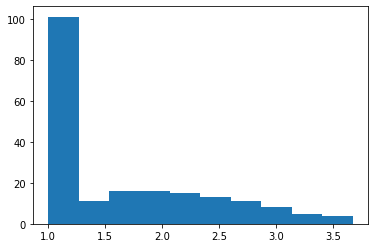

In [14]:
plt.hist(w1)

(array([76., 19., 24., 22., 22., 17.,  9.,  8.,  1.,  2.]),
 array([1.      , 1.382353, 1.764706, 2.147059, 2.529412, 2.911765,
        3.294118, 3.676471, 4.058824, 4.441177, 4.82353 ]),
 <BarContainer object of 10 artists>)

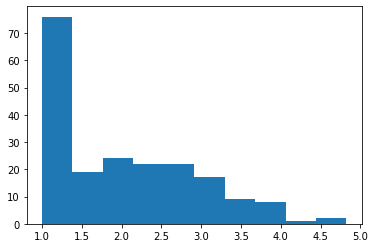

In [15]:
plt.hist(w2)

Text(0, 0.5, 'мВ')

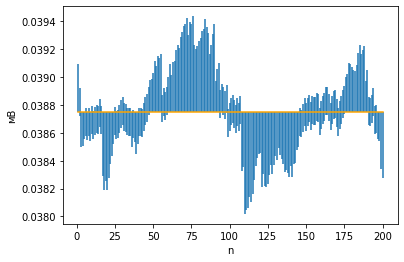

In [16]:
data1_fixed = [y - (i + 1) * B1 for i, y in enumerate(data1)]
for i in data1.index:
    plt.vlines(i + 1, data1_fixed[i] + w1[i]*ksi, data1_fixed[i] - w1[i]*ksi)
plt.plot(np.arange(1, 201), [A1]*200, label='lsm', color='orange')
plt.xlabel('n')
plt.ylabel('мВ')

Text(0, 0.5, 'мВ')

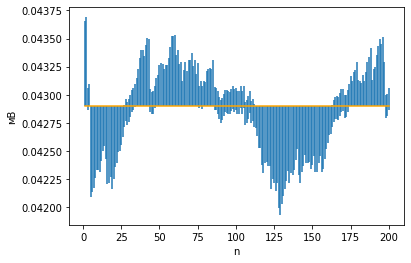

In [17]:
data2_fixed = [y - (i + 1) * B2 for i, y in enumerate(data2)]
for i in data2.index:
    plt.vlines(i + 1, data2_fixed[i] + w2[i]*ksi, data2_fixed[i] - w2[i]*ksi)
plt.plot(np.arange(1, 201), [A2]*200, label='lsm', color='orange')
plt.xlabel('n')
plt.ylabel('мВ')

(array([ 5., 16., 21., 23., 35., 31., 17., 19., 18., 15.]),
 array([0.03838536, 0.03845622, 0.03852708, 0.03859794, 0.03866881,
        0.03873967, 0.03881053, 0.03888139, 0.03895225, 0.03902311,
        0.03909398]),
 <BarContainer object of 10 artists>)

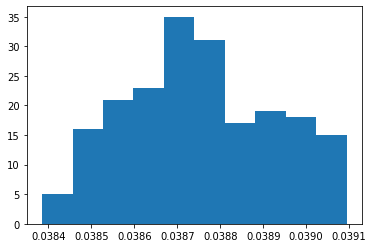

In [18]:
plt.hist(data1_fixed)

(array([ 5., 17., 33., 14., 11., 27., 35., 37., 15.,  6.]),
 array([0.04241521, 0.04250302, 0.04259083, 0.04267864, 0.04276644,
        0.04285425, 0.04294206, 0.04302986, 0.04311767, 0.04320548,
        0.04329328]),
 <BarContainer object of 10 artists>)

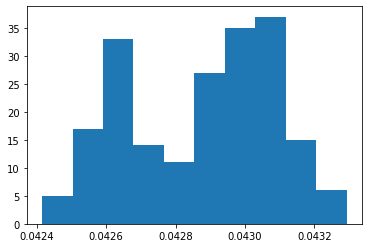

In [19]:
plt.hist(data2_fixed)

In [20]:
data1_fixed_int = [[y - w1[i]*ksi, y + w1[i]*ksi] for i, y in enumerate(data1_fixed)]
data2_fixed_int = [[y - w2[i]*ksi, y + w2[i]*ksi] for i, y in enumerate(data2_fixed)]

In [21]:
def countJaccar(R):
    data1_new = [[data1_fixed_int[i][0] * R, data1_fixed_int[i][1] * R] for i in range(len(data1_fixed_int))]
    all_data = data1_new + data2_fixed_int
    min_inc = list(all_data[0])
    max_inc = list(all_data[0])
    for interval in all_data:
        min_inc[0] = max(min_inc[0], interval[0])
        min_inc[1] = min(min_inc[1], interval[1])
        max_inc[0] = min(max_inc[0], interval[0])
        max_inc[1] = max(max_inc[1], interval[1])
    JK = (min_inc[1] - min_inc[0]) / (max_inc[1] - max_inc[0])
    return JK

In [22]:
R_interval = np.linspace(1.06, 1.16, 1000)
Jaccars = []
for R in R_interval:
    Jaccars.append(countJaccar(R))

optimal_x = opt.fmin(lambda x: -countJaccar(x), 0.85, xtol=1e-11)
min1 = opt.root(countJaccar, 0.8, tol=1e-11)     
max1 = opt.root(countJaccar, 0.9, method='lm', tol=1e-11) 

Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 38
         Function evaluations: 82


Text(0.5, 1.0, 'Jaccard vs R')

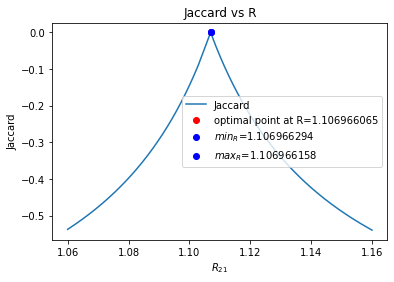

In [23]:
plt.plot(R_interval, Jaccars, label="Jaccard", zorder=1)
plt.scatter(optimal_x[0], countJaccar(optimal_x[0]), label=f"optimal point at R={round(optimal_x[0], 9)}",color="r")
plt.scatter(min1.x, countJaccar(min1.x), label=f"$min_R$={round(min1.x[0],9)}", color="b", zorder=2)
plt.scatter(max1.x, countJaccar(max1.x), label=f"$max_R$={round(max1.x[0],9)}", color="b", zorder=2)
plt.legend()
plt.xlabel('$R_{21}$')
plt.ylabel('Jaccard')
plt.title('Jaccard vs R')

Text(0.5, 1.0, 'Histogram of combined data with optimal R21')

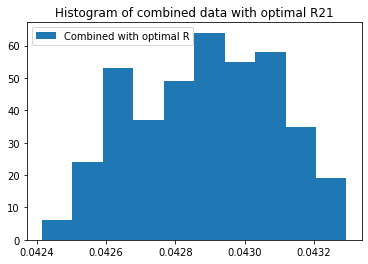

In [24]:
data1_new = [[data1_fixed_int[i][0] * optimal_x[0], data1_fixed_int[i][1] * optimal_x[0]] for i in range(len(data1_fixed_int))]
all_data = data1_new + data2_fixed_int
plt.hist([(inter[0] + inter[1]) / 2 for inter in all_data], label="Combined with optimal R")
plt.legend()
plt.title('Histogram of combined data with optimal R21')